<a href="https://colab.research.google.com/github/lucandro/IBM/blob/main/Predicci%C3%B3n_de_aprendizaje_autom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del aterrizaje de la primera etapa del Falcon 9 de SpaceX


## Tarea:
Predicción de aprendizaje automático

Tiempo necesario estimado: 60 minutos

Space X anuncia lanzamientos de cohetes Falcon 9 en su sitio web con un costo de 62 millones de dólares; otros proveedores cuestan más de 165 millones de dólares cada uno; gran parte de los ahorros se deben a que Space X puede reutilizar la primera etapa. Por lo tanto, si podemos determinar si la primera etapa aterrizará, podemos determinar el costo de un lanzamiento. Esta información se puede utilizar si una empresa alternativa desea presentar una oferta contra Space X para el lanzamiento de un cohete. En este laboratorio, creará una secuencia de aprendizaje automático para predecir si la primera etapa aterrizará según los datos de los laboratorios anteriores.

La mayoría de los aterrizajes fallidos son planeados. Space X; realiza un aterrizaje controlado en los océanos.
## Objetivos

- Realizar análisis exploratorio de datos y determinar etiquetas de entrenamiento

    - Crear una columna para la clase
    - Estandarizar los datos
    - Dividir en datos de entrenamiento y datos de prueba

- Encontrar el mejor hiperparámetro para SVM, árboles de clasificación y regresión logística

    - Encontrar el método que funciona mejor utilizando datos de prueba

Importar bibliotecas y definir funciones auxiliares

In [1]:
# Pandas es una biblioteca de software escrita para el lenguaje de programación Python para la manipulación y el análisis de datos.
import pandas as pd
# NumPy es una biblioteca para el lenguaje de programación Python, que agrega soporte para matrices y arreglos multidimensionales grandes, junto con una gran colección de funciones matemáticas de alto nivel para operar en estos arreglos
import numpy as np
# Matplotlib es una biblioteca de gráficos para Python y Pyplot nos brinda un marco de trabajo de gráficos similar a MatLab. Lo usaremos en nuestra función de trazador para representar los datos.
import matplotlib.pyplot as plt
#Seaborn es una biblioteca de visualización de datos de Python basada en Matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos
import seaborn as sns
# El preprocesamiento nos permite estandarizar nuestros datos
from sklearn import preprocessing
# Nos permite dividir nuestros datos en datos de prueba y de entrenamiento
from sklearn.model_selection import train_test_split
# Nos permite probar los parámetros de los algoritmos de clasificación y encontrar el mejor
from sklearn.model_selection import GridSearchCV
# Algoritmo de clasificación de regresión logística
from sklearn.linear_model import LogisticRegression
# Algoritmo de clasificación de máquina de vectores de soporte
from sklearn.svm import SVC
# Algoritmo de clasificación de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# Algoritmo de clasificación de K vecinos más cercanos
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

Esta función sirve para trazar la matriz de confusión.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TAREA 1

Cree una matriz NumPy a partir de la columna Class en data, aplicando el método `to_numpy()` y luego asígnela a la variable Y. Asegúrese de que la salida sea una serie Pandas (solo un corchete `df['nombre de la columna']`).

In [5]:
Y = data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TAREA 2

Estandarice los datos en X y luego reasígnelos a la variable X utilizando la transformación que se proporciona a continuación.

In [6]:
# Las estudiantes obtienen esto
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-1.712912,-1.948145e-16,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,1.812654,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,-0.106,-0.106,1.527525,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,1.870829,-1.870829,0.835532,-0.835532,1.933091,-1.933091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,5.385165,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,-0.185695,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,-0.106,-0.106,-0.654654,-0.106,-0.551677,...,-0.185695,-0.215666,5.385165,-0.106000,-0.534522,0.534522,-1.196843,1.196843,-0.517306,0.517306


Dividimos los datos en datos de entrenamiento y de prueba utilizando la función `train_test_split`. Los datos de entrenamiento se dividen en datos de validación y un segundo conjunto se utiliza para los datos de entrenamiento; luego, se entrenan los modelos y se seleccionan los hiperparámetros utilizando la función `GridSearchCV`.

## TAREA 3

Utilice la función train_test_split para dividir los datos X e Y en datos de entrenamiento y de prueba. Establezca el parámetro `test_size en 0,2` y `random_state` en 2.

Los datos de entrenamiento y de prueba deben asignarse a las siguientes etiquetas.

`X_train, X_test, Y_train, Y_test`

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [9]:
Y_test.shape

(18,)

## TAREA 4

Cree un objeto de regresión logística y luego cree un objeto GridSearchCV logreg_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros a partir de los parámetros del diccionario.

In [10]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [11]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lazo l2 cresta
# Crear un objeto de regresión logística
lr=LogisticRegression()

# Crear un objeto GridSearchCV logreg_cv
logreg_cv = GridSearchCV(lr, parameters, cv=10)

#Ajuste los datos de entrenamiento en el objeto GridSearch
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [12]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TAREA 5

Calcule la precisión de los datos de prueba utilizando el método de puntuación:

In [13]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,Y_test))
methods.append('logistic regression')
print("Logistic Regression test data accuracy :",logreg_cv.score(X_test, Y_test))

Logistic Regression test data accuracy : 0.8333333333333334


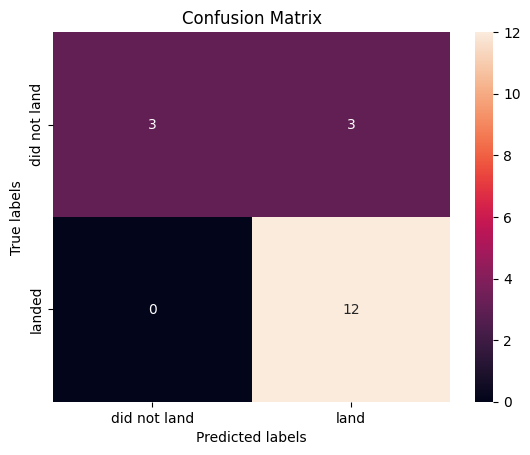

In [14]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Al examinar la matriz de confusión, vemos que la regresión logística puede distinguir entre las diferentes clases. Vemos que el problema son los falsos positivos.

Descripción general:

- Verdadero positivo: 12 (la etiqueta verdadera está definida, la etiqueta predicha también está definida)

- Falso positivo: 3 (la etiqueta verdadera no está definida, la etiqueta predicha está definida)

## TAREA 6

Cree un objeto de máquina de vectores de soporte y luego cree un objeto GridSearchCV svm_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros a partir de los parámetros del diccionario.

In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# Crear una máquina de vectores de soporte
svm = SVC()

In [16]:
# crea un objeto GridSearchCV svm_cv con cv = 10
svm_cv = GridSearchCV(svm, parameters,scoring='accuracy' ,cv= 10)

#Ajuste los datos de entrenamiento en el objeto GridSearch
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TAREA 7

Calcule la precisión de los datos de prueba utilizando el método de puntuación:

In [18]:
accu.append(svm_cv.score(X_test,Y_test))
methods.append('support vector machine')
print("SVM test data accuracy :",svm_cv.score(X_test, Y_test))

SVM test data accuracy : 0.8333333333333334


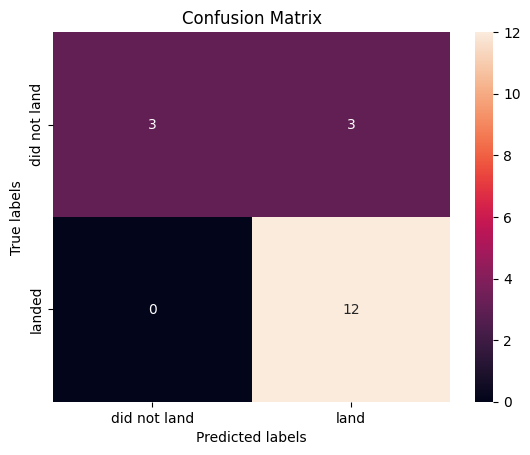

In [19]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TAREA 8

Cree un objeto clasificador de árbol de decisión y luego cree un objeto GridSearchCV tree_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros a partir de los parámetros del diccionario.

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Crear un objeto clasificador de árbol de decisión
tree = DecisionTreeClassifier()

In [21]:
# crea un objeto GridSearchCV tree_cv con cv = 10
tree_cv = GridSearchCV(tree, parameters,scoring='accuracy' ,cv= 10)

#Ajuste los datos de entrenamiento en el objeto GridSearch
tree_cv.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [22]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857143


## TAREA 9

Calcule la precisión de tree_cv en los datos de prueba utilizando el método score:

In [23]:
accu.append(tree_cv.score(X_test,Y_test))
methods.append('decision tree classifier')
print("Decision Tree accuracy on test set :",tree_cv.score(X_test, Y_test))

Decision Tree accuracy on test set : 0.6666666666666666


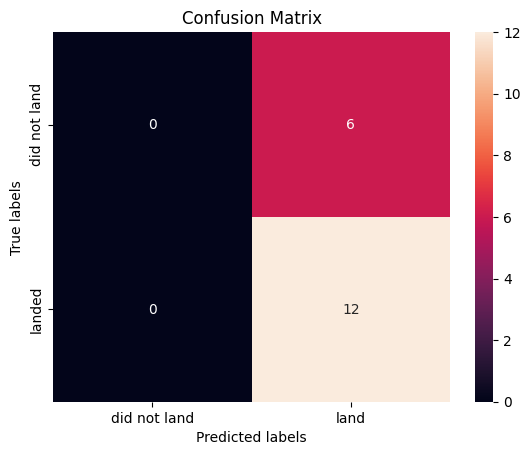

In [24]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TAREA 10

Cree un objeto de k vecinos más cercanos y luego cree un objeto GridSearchCV knn_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros a partir de los parámetros del diccionario.

In [25]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Crear un objeto clasificador KNN
KNN = KNeighborsClassifier()

In [26]:
# crea un objeto GridSearchCV knn_cv con cv = 10
knn_cv = GridSearchCV(KNN, parameters, scoring='accuracy',cv= 10)

#Ajuste los datos de entrenamiento en el objeto GridSearch
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy')

In [27]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TAREA 11

Calcule la precisión de knn_cv en los datos de prueba utilizando el método score:

In [28]:
accu.append(knn_cv.score(X_test,Y_test))
methods.append('k nearest neighbors')
knn_cv.score(X_test,Y_test)

0.8333333333333334

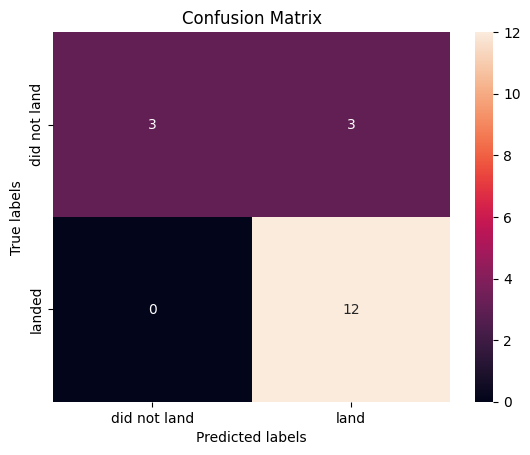

In [29]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TAREA 12

Encuentre el método que mejor funciona:

In [30]:
Report = pd.DataFrame({'Method' : ['Test Data Accuracy']})

knn_accuracy=knn_cv.score(X_test, Y_test)
Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
SVM_accuracy=svm_cv.score(X_test, Y_test)
Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [Logistic_Regression]
Report['SVM'] = [SVM_accuracy]
Report['Decision Tree'] = [Decision_tree_accuracy]
Report['KNN'] = [knn_accuracy]




Report.transpose()

,0
Method,Test Data Accuracy
Logistic_Reg,0.833333
SVM,0.833333
Decision Tree,0.666667
KNN,0.833333


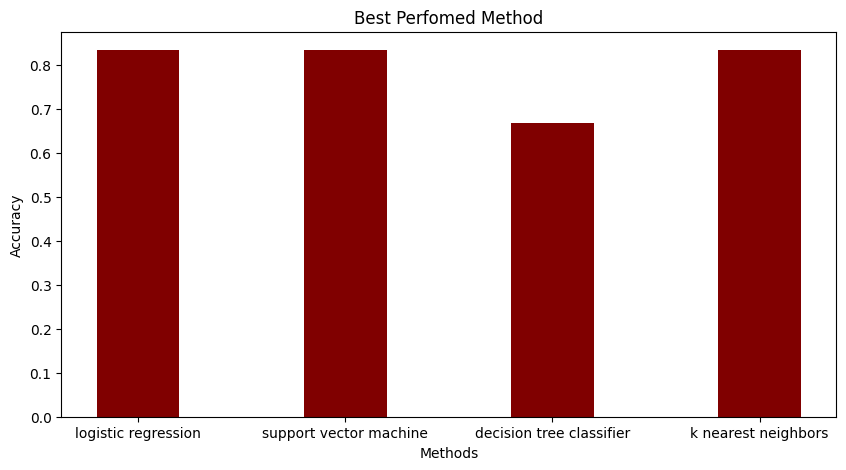

In [31]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize = (10, 5))

# creando el gráfico de barras
plt.bar(methods, accu, color ='maroon',
        width = 0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()